In [1]:
#import statements
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
plt.style.use("fivethirtyeight")

In [7]:
#getting stock
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-03-17')

In [10]:
df.shape

(2064, 6)

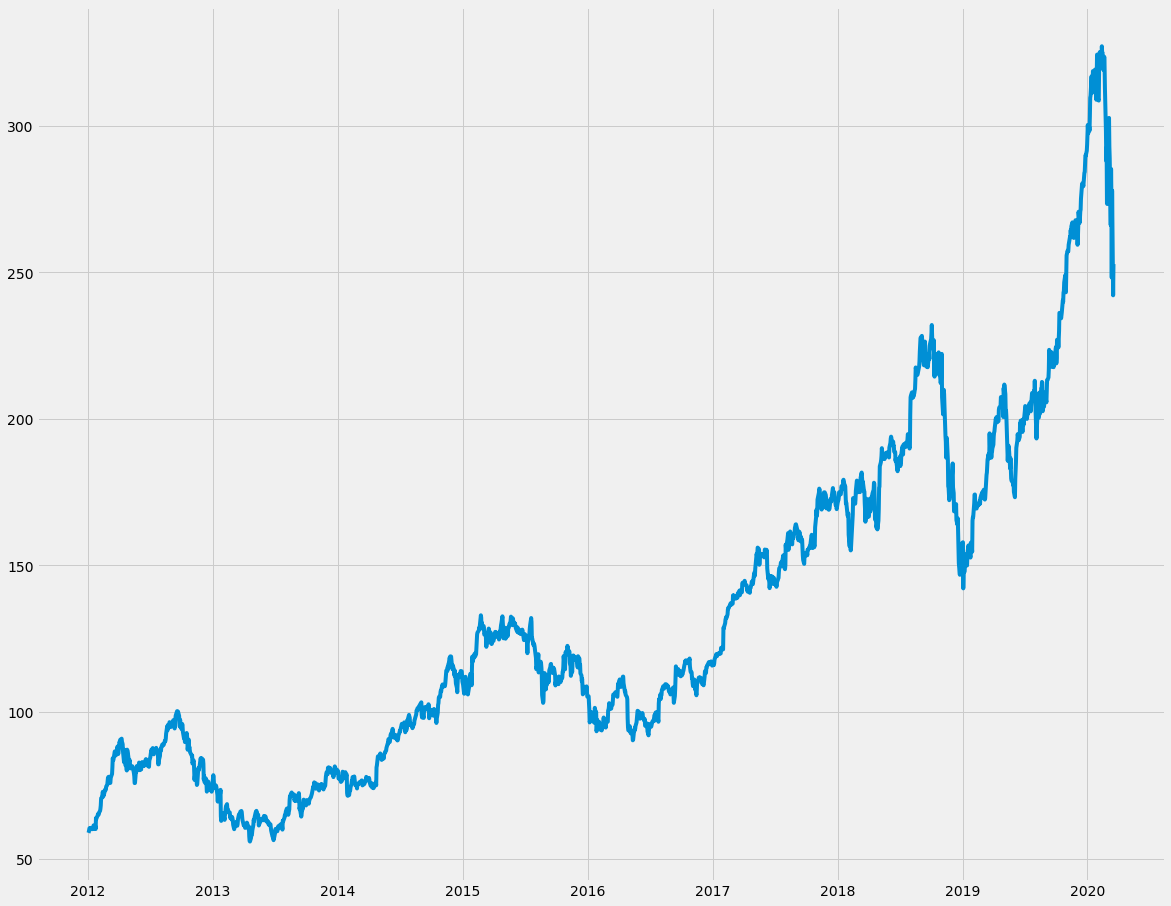

In [13]:
plt.figure(figsize=(18,15))
plt.plot(df['Close'])
plt.show()

In [73]:
data=(df.filter(['Close'])).values
t_data_len=math.ceil(0.8*len(data))
data1=df.filter(['Close'])

In [32]:
sc=MinMaxScaler(feature_range=(0,1))
sdata=sc.fit_transform(data)

In [45]:
tr_data=sdata[0:t_data_len,:]

x_tr=[]
y_tr=[]
for i in range(60,len(tr_data)):
     x_tr.append(tr_data[i-60:i,0])
     y_tr.append(tr_data[i,0])

In [49]:
x_tr=np.array(x_tr)
y_tr=np.array(y_tr)
x_tr=np.reshape(x_tr,(x_tr.shape[0],x_tr.shape[1],1))

In [50]:
x_tr.shape

(1592, 60, 1)

In [57]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_tr.shape[1],1)))
model.add(LSTM(60,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [58]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
model.fit(x_tr,y_tr,batch_size=1,epochs=1)

Epoch 1/1
1592/1592 [==============================] - 61s 38ms/step - loss: 6.2767e-04


In [64]:
d_test=sdata[t_data_len-60:,:]
x_test=[]
y_test=data[t_data_len:,:]
for i in range(60,len(d_test)):
    x_test.append(d_test[i-60:i,0])
    
    

In [66]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [67]:
#prediction
pred=model.predict(x_test)
pred=sc.inverse_transform(pred)

In [69]:
rms=np.sqrt(np.mean((pred-y_test)**2))

In [70]:
rms

9.108423959379548

In [75]:
#ploting
train=data1[:t_data_len]
valid=data1[t_data_len:]
valid['predictioins']=pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


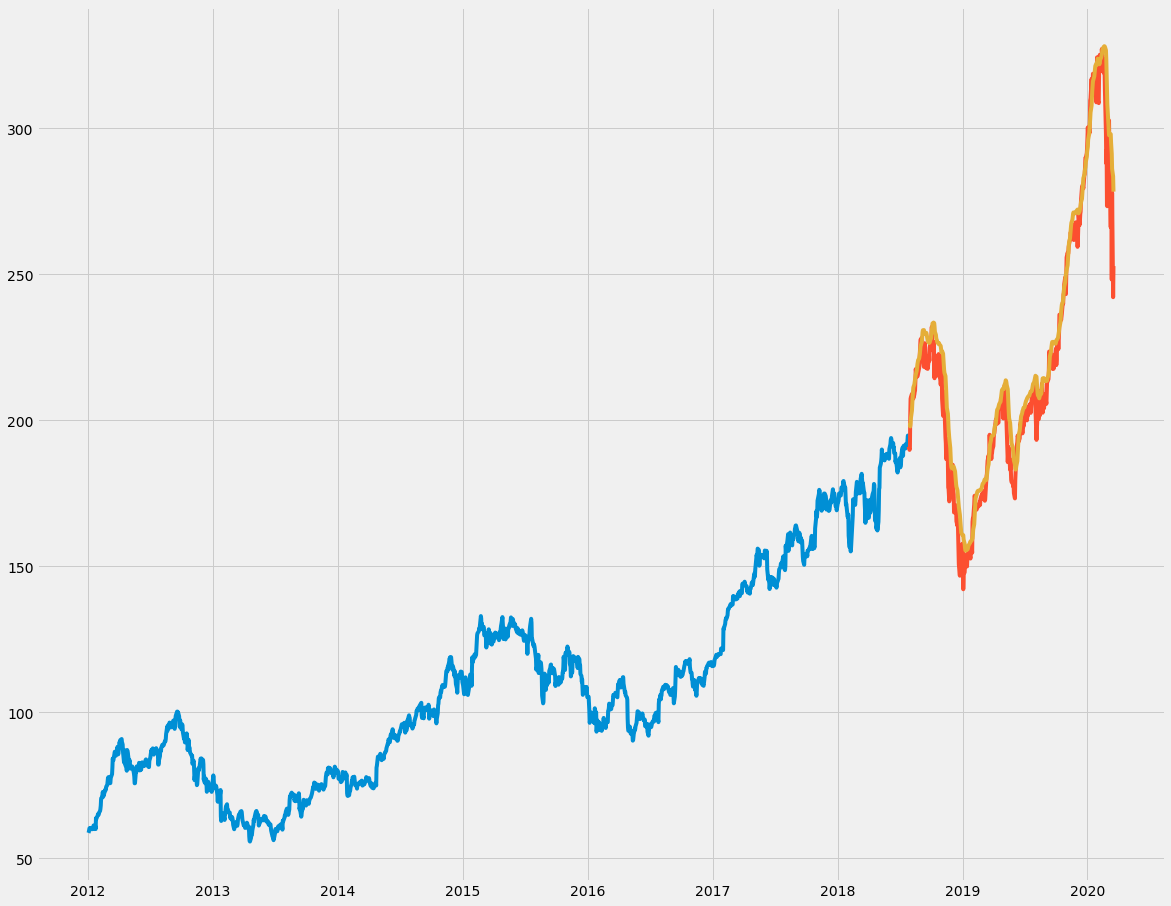

In [78]:
#plot
plt.figure(figsize=(18,15))
plt.plot(train['Close'])
plt.plot(valid[['Close','predictioins']])
plt.show()